# 드라이브 마운트 / 모듈 임포트 / 한글 폰트 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import ast
import numpy as np

In [3]:
current_directory = "/content/drive/MyDrive/Colab Notebooks"
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

# 폰트가 있는지 확인하고 추가
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)

    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 출력 설정

    sns.set(font=font_prop.get_name())  # Seaborn에서도 폰트 설정
    print("한글 폰트가 성공적으로 설정되었습니다.")
else:
    print("폰트를 찾을 수 없습니다. 경로를 확인하세요.")

한글 폰트가 성공적으로 설정되었습니다.


# 1. Dataset Describe

<br>

- **도로교통공단**: https://taas.koroad.or.kr/web/shp/mik/main.do?menuId=WEB_KMP
  - 교통사고 데이터를 수집, 통합.분석하여 교통안전 정책수립등에 활용할 수 있도록 교통사고 정보를 제공하는 사이트.
  - 경찰청, 보험회사 및 공제조합등 각각 분산된 교통사고자료를 수집하여 정부 및
  지자체, 일반시민등에게 정보를 제공함으로써 **교통안전정책 추진등에 활용토록 지원**
  - 프로젝트의 필요성을 확인하기 위한 공공데이터 수집 용도로 사용.

<br>

- **분쟁심의위원회**: https://accident.knia.or.kr/
  - 자동차사고 과실비율 분쟁 등의 심의에 대한 교통사고 분쟁심의위원회 사이트.
  - 교통사고에 이의를 제기한 **실제 사례**들과 판결 결과를 수집하고, 일반적인 다양한 케이스의 **과실비율 기준**을 참조하는 용도로 사용.


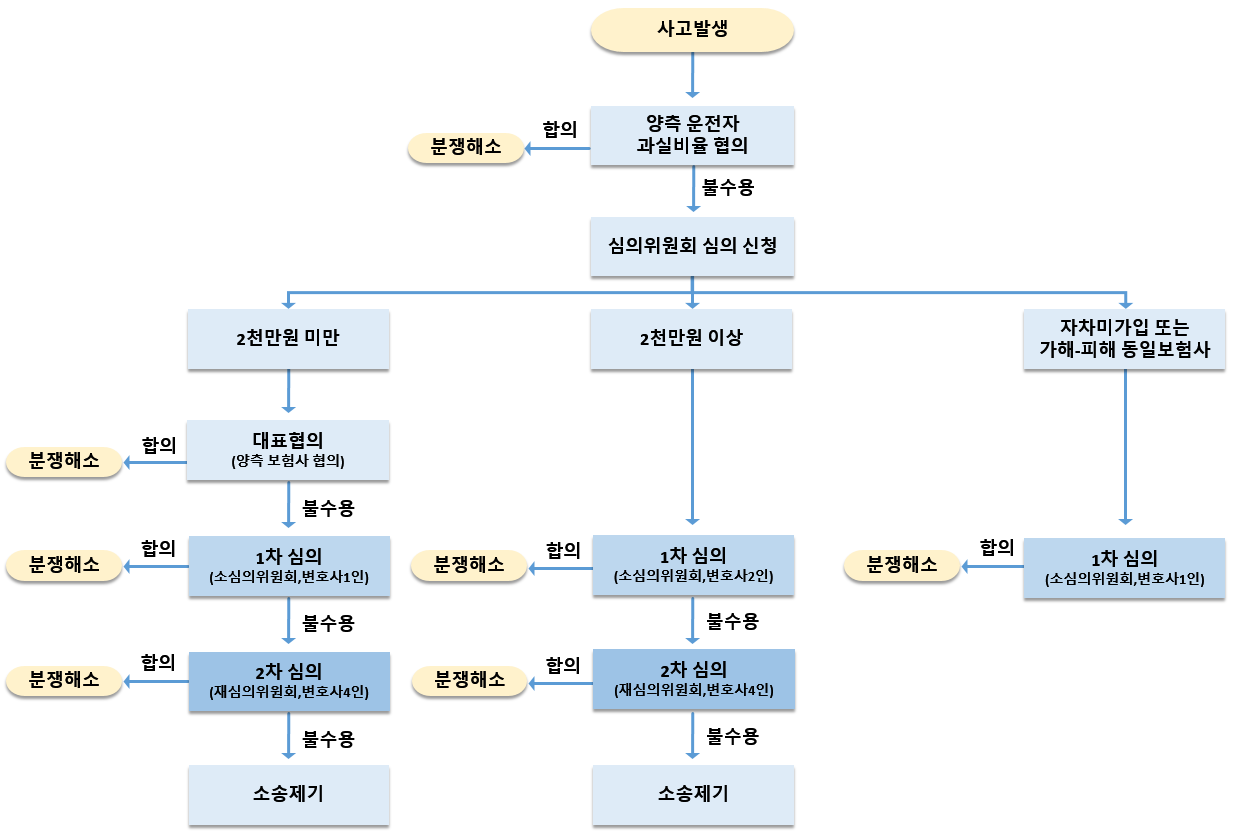

In [ ]:
from IPython.display import Image
img_path = '/content/drive/MyDrive/kdt_240424/Team Project/2차/system.png'
Image(filename=img_path)

# 2. Data Load

In [ ]:
# 자동차등록대수현황_연도별
file_path ='/content/drive/MyDrive/kdt_240424/Team Project/2차/자동차등록대수현황_연도별.csv'
vehicle_df = pd.read_csv(file_path, encoding='utf-8')
vehicle_df.head()

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,승용,16561665,17338160,18034540,18676924,19177517,19860955,20410648,20952759,21390202
1,승합,920320,892539,867522,843794,811799,783842,749968,723961,694574
2,화물,3432937,3492173,3540323,3590939,3592586,3615245,3631975,3696317,3726400
3,특수,74963,80479,85910,90898,95464,105937,118510,130041,138025


# 3. 시각화 그래프 Segmentation

#### 자동차등록대수현황_연도별
 - 차량대수 증가함에 따라 효과적인 사고 예방 및 관리 시스템의 필요성이 강조됩니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

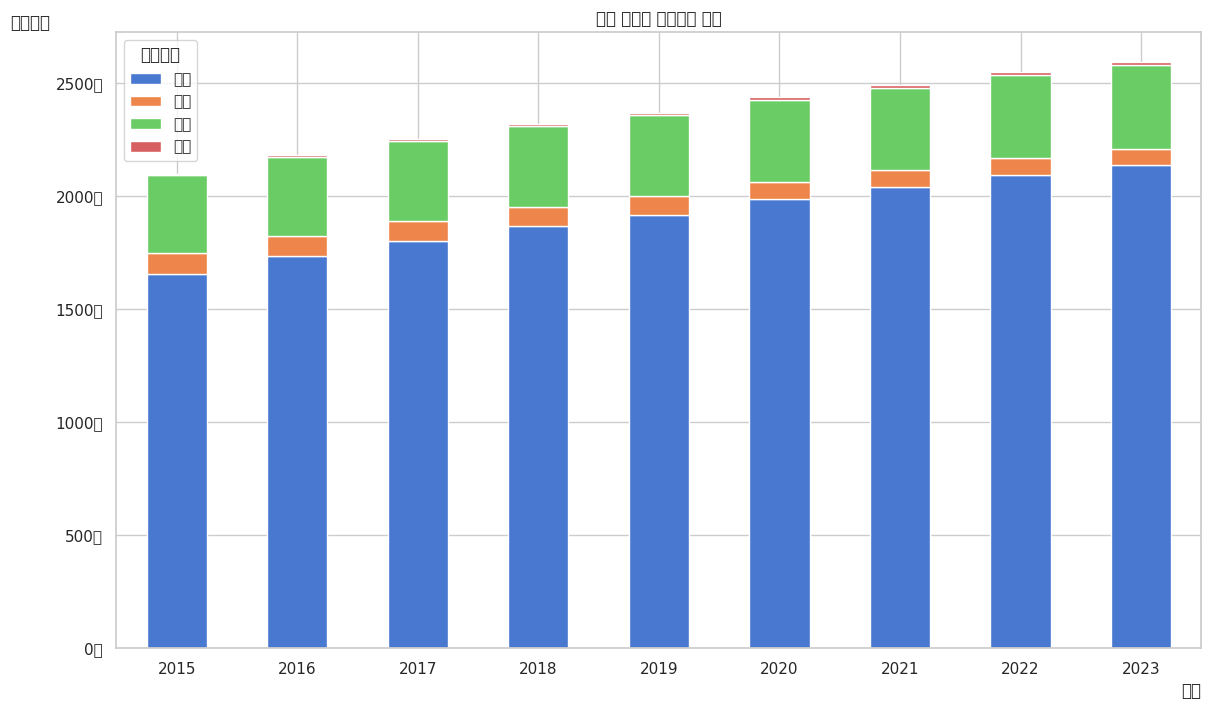

In [ ]:
import matplotlib.ticker as ticker

# 데이터프레임을 인덱스 설정 후 정수형으로 변환
df = vehicle_df.set_index(vehicle_df.columns[0])
df = df.astype(int)

ax = df.T.plot(kind='bar', stacked=True, figsize=(14, 8))

# Y축 값을 1만 단위로 설정
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/10000)}만'))

# 바 플롯 (Bar Plot)
plt.title('연간 자동차 등록대수 추이')
plt.xlabel('연도', loc='right')
plt.ylabel('차량대수',rotation=0, loc='top')
plt.legend(title='차량종류')
plt.xticks(rotation=0)
plt.show()

#### 연도별 법규위반별 사고 건수 TOP 5
 - 법규 위반이 사고 발생에 미치는 영향을 시각화 함으로써 다양한 케이스 중 비중에 따라 기계학습의 비중을 효과적으로 배분할 수 있음

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

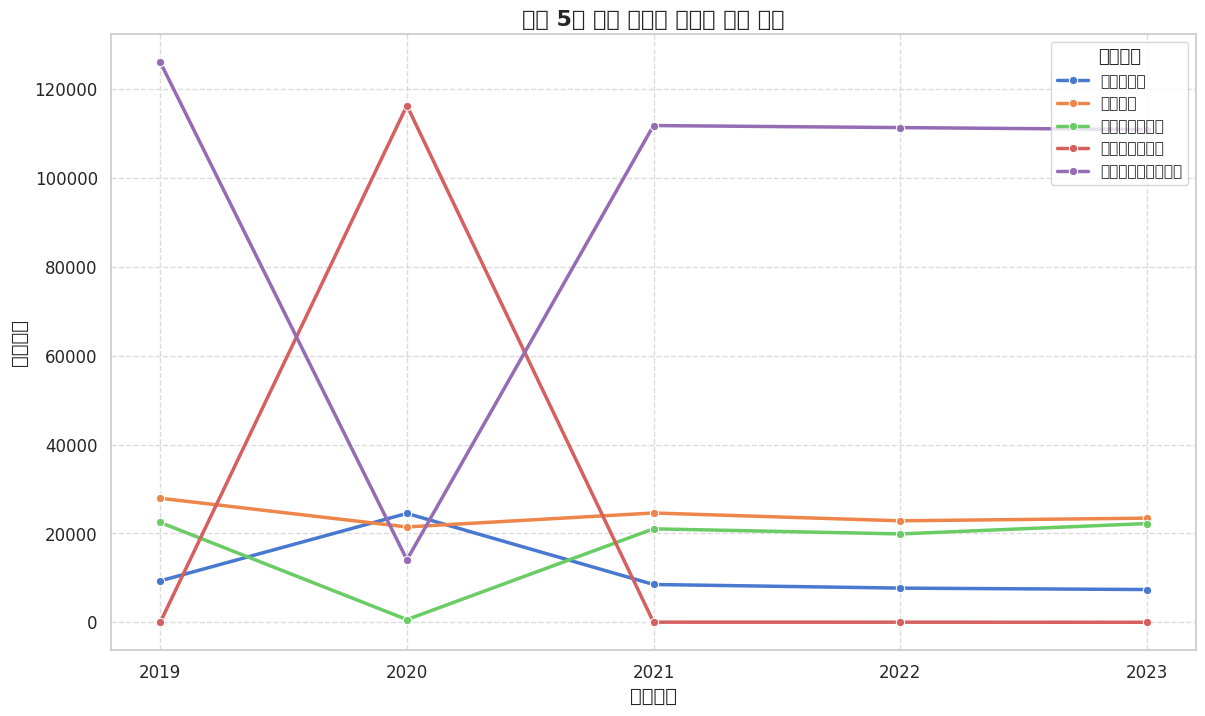

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/Team Project/2차/top_5_accident_data.csv')

# '기준년도'를 문자열로 변환하여 범주형으로 처리
df['기준년도'] = df['기준년도'].astype(str)

# 상위 5개 사고 유형 찾기
accident_sum = df.groupby('사고유형')['사고건수'].sum().reset_index()
top_5_types = accident_sum.sort_values(by='사고건수', ascending=False).head(5)['사고유형']

# 상위 5개 사고 유형으로 데이터 필터링
top_5_data = df[df['사고유형'].isin(top_5_types)]

# 스타일 설정
sns.set(style="whitegrid", palette="muted")

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_5_data, x='기준년도', y='사고건수', hue='사고유형', marker='o', linewidth=2.5)

# 그래프 제목 및 레이블 설정
plt.title('상위 5개 사고 유형의 연도별 사고 건수', fontsize=16, fontweight='bold')
plt.xlabel('기준년도', fontsize=14, fontweight='bold')
plt.ylabel('사고건수', fontsize=14, fontweight='bold')
plt.legend(title='사고유형', title_fontsize='13', fontsize='11', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# 그래프 표시
plt.grid(True)
plt.show()


#### 사고유형별_발생건수

Index(['사고유형대분류', '사고유형중분류', '사고건수'], dtype='object')
  사고유형대분류 사고유형중분류   사고건수
0     차대차    정면충돌   7899
1     차대차    측면충돌  65621
2     차대차      추돌  31939
3     차대차      기타  43459
4     차대차   후진중충돌   4017


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

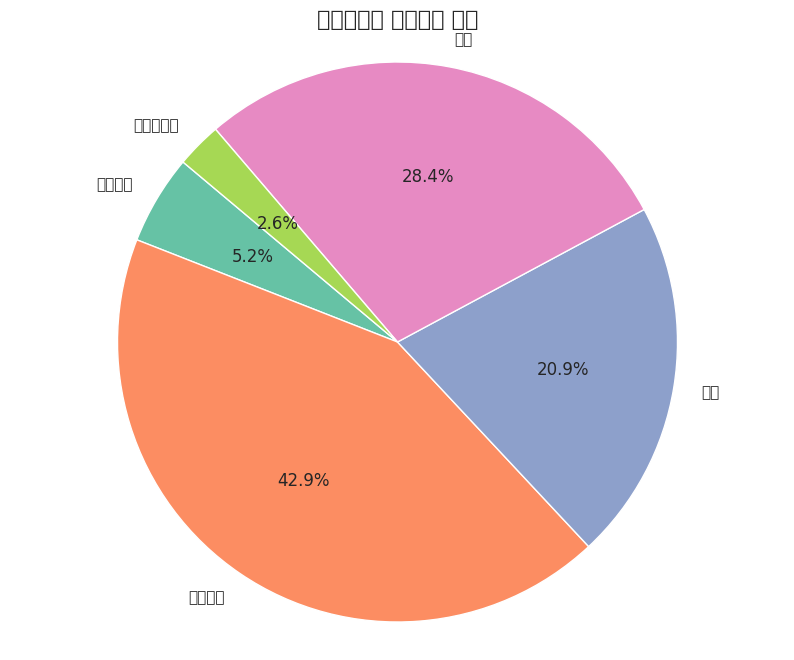

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 경로 설정
file_path = '/content/drive/MyDrive/kdt_240424/Team Project/2차/사고유형별_발생건수.xls'

df = pd.read_excel(file_path, header=1)

# 데이터의 열 이름 확인
print(df.columns)
print(df.head())

# 필요한 데이터 추출
labels = df['사고유형중분류']
sizes = df['사고건수']

# 파이차트 생성
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors)
plt.title('사고유형별 사고건수 비율', fontsize=16)
plt.axis('equal')  # 동그란 파이차트를 유지하기 위해

# 파이차트 표시
plt.show()

#### 연령대별 사고 발생건수
 - 연령대별 가해운전자 비율을 근거로 연령대별 사고 위험도를 확인가능.
 - 서비스를 이용할 주요 타겟층을 설정하여 맞춤형 파인튜닝을 제작할 수 있음.

      연령대     발생건수
0   20세이하   3654.0
1  21~30세  19992.0
2  31~40세  22187.0
3  41~50세  25872.0
4  51~60세  33737.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

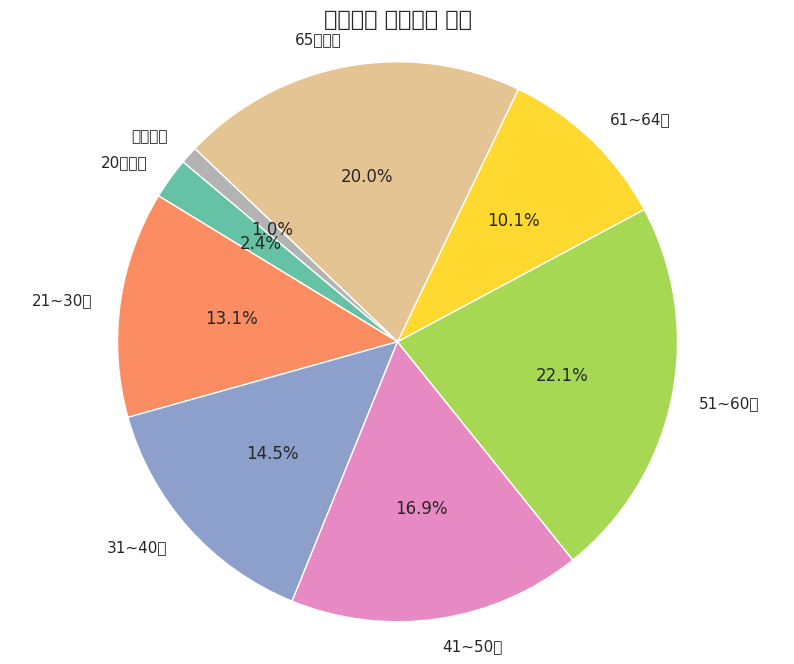

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일에서 데이터 읽기
file_path = '/content/drive/MyDrive/kdt_240424/Team Project/2차/연령대별_발생건수.xls'
df = pd.read_excel(file_path)

# 데이터 확인
print(df.head())

# 데이터 전처리
# NaN 값 확인 및 처리
df = df.dropna()

# 열 이름을 명확히 지정
df.columns = ['연령대', '발생건수']

# 파이 그래프 생성
plt.figure(figsize=(10, 8))
plt.pie(df['발생건수'], labels=df['연령대'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2(range(len(df))))

plt.title('연령대별 발생건수 분포', fontsize=16)
plt.axis('equal')  # 원형 그래프가 원으로 보이도록 유지

# 그래프 표시
plt.show()


In [ ]:
import requests
from urllib.parse import quote

# API 키와 엔드포인트 설정
api_key = '66VYy8yTRsqTHFE34NApr6VjtoobN5fwHwNcturhkButOJ2OeIktns%2F1UiW5YNHE'
url = f'https://opendata.koroad.or.kr/data/rest/frequentzone/lg?authKey={api_key}&searchYearCd=2023&sido=42&gugun=130'

# 파라미터 설정
params = {
    'authKey': api_key,
    'searchYearCd': '2023',
    'sido': '42',
    'gugun': '130'
}

# API 호출
response = requests.get(url, params=params)

# 응답 상태 코드와 헤더 확인
print("상태 코드:", response.status_code)
print("콘텐츠 타입:", response.headers.get('Content-Type'))

# 응답 내용 출력
print("응답 내용 (텍스트):", response.text)

# 응답 데이터 처리
try:
    data = response.json()  # JSON 형식으로 응답 처리
    print("응답 데이터:", data)
except requests.exceptions.JSONDecodeError as e:
    print("JSON 디코딩 오류 발생:", e)


상태 코드: 417
콘텐츠 타입: text/xml;charset=UTF-8
응답 내용 (텍스트): <response>
    <header>
        <resultCode>30</resultCode>
        <resultMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</resultMsg>
    </header>
</response>

JSON 디코딩 오류 발생: Expecting value: line 1 column 1 (char 0)


In [ ]:
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# 지역명을 시도 코드와 구군 코드로 변환하는 함수
def get_area_codes(area_name):
    # 여기에 실제 지역명과 코드 매핑을 구현해야 합니다.
    area_mapping = {
        "서울특별시": ("11", "200"),  # 예시: 서울특별시
        "부산광역시": ("21", "100"),  # 예시: 부산광역시
        # 추가적인 지역명과 코드 매핑
    }
    return area_mapping.get(area_name, ("00", "000"))

def fetch_accident_data(siDo, guGun):
    url = 'http://apis.data.go.kr/B552061/frequentzoneLg/getRestFrequentzoneLg'
    params = {
        'serviceKey': '66VYy8yTRsqTHFE34NApr6VjtoobN5fwHwNcturhkButOJ2OeIktns%2F1UiW5YNHE',  # 실제 API 키로 대체하세요
        'searchYearCd': '2017',
        'siDo': siDo,
        'guGun': guGun,
        'type': 'xml',
        'numOfRows': '10',
        'pageNo': '1'
    }

    response = requests.get(url, params=params)
    return response.content

def parse_data(xml_content):
    root = ET.fromstring(xml_content)
    items = root.findall(".//item")

    data = []
    for item in items:
        area_name = item.find('sido_sgg_nm').text if item.find('sido_sgg_nm') is not None else 'Unknown'
        accident_count = int(item.find('occrrnc_cnt').text) if item.find('occrrnc_cnt') is not None else 0
        data.append((area_name, accident_count))

    return data

def visualize_data(data):
    if data:
        areas, counts = zip(*data)

        plt.figure(figsize=(10, 6))
        plt.bar(areas, counts, color='skyblue')
        plt.xlabel('Area Name')
        plt.ylabel('Accident Count')
        plt.title('Accident Count by Area')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to visualize.")

def main():
    area_name = input("Enter the area name: ")
    siDo, guGun = get_area_codes(area_name)

    if siDo == "00" and guGun == "000":
        print("Invalid area name or area not found.")
        return

    xml_content = fetch_accident_data(siDo, guGun)
    data = parse_data(xml_content)
    visualize_data(data)

if __name__ == "__main__":
    main()


Enter the area name: 11
Invalid area name or area not found.


In [ ]:
import pandas as pd

# 엑셀 파일 읽기
def load_area_codes(file_path):
    df = pd.read_excel(file_path)

    # 시도 코드와 구군 코드가 포함된 데이터 추출
    # 데이터프레임의 열 이름은 실제 엑셀 파일의 열 이름에 맞게 조정해야 합니다.
    area_codes = {}
    for _, row in df.iterrows():
        area_name = row['지역명']  # 지역명 열 이름 조정
        siDo_code = row['시도코드']  # 시도코드 열 이름 조정
        guGun_code = row['구군코드']  # 구군코드 열 이름 조정
        area_codes[area_name] = (siDo_code, guGun_code)

    return area_codes

# 예제 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/AccidentHazard_CodeList.xlsx'
area_codes = load_area_codes(file_path)

# 사용자가 지역명을 입력하고 해당 코드 정보를 가져오는 함수
def get_area_codes(area_name):
    return area_codes.get(area_name, ("00", "000"))

# 나머지 코드 (API 호출 및 시각화 등)는 이전 예제와 동일하게 적용됩니다.

def fetch_accident_data(siDo, guGun):
    url = 'http://apis.data.go.kr/B552061/frequentzoneLg/getRestFrequentzoneLg'
    params = {
        'serviceKey': '66VYy8yTRsqTHFE34NApr6VjtoobN5fwHwNcturhkButOJ2OeIktns%2F1UiW5YNHE',  # 실제 API 키로 대체하세요
        'searchYearCd': '2017',
        'siDo': siDo,
        'guGun': guGun,
        'type': 'xml',
        'numOfRows': '10',
        'pageNo': '1'
    }

    response = requests.get(url, params=params)
    return response.content

def parse_data(xml_content):
    root = ET.fromstring(xml_content)
    items = root.findall(".//item")

    data = []
    for item in items:
        area_name = item.find('sido_sgg_nm').text if item.find('sido_sgg_nm') is not None else 'Unknown'
        accident_count = int(item.find('occrrnc_cnt').text) if item.find('occrrnc_cnt') is not None else 0
        data.append((area_name, accident_count))

    return data

def visualize_data(data):
    if data:
        areas, counts = zip(*data)

        plt.figure(figsize=(10, 6))
        plt.bar(areas, counts, color='skyblue')
        plt.xlabel('Area Name')
        plt.ylabel('Accident Count')
        plt.title('Accident Count by Area')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to visualize.")

def main():
    area_name = input("Enter the area name: ")
    siDo, guGun = get_area_codes(area_name)

    if siDo == "00" and guGun == "000":
        print("Invalid area name or area not found.")
        return

    xml_content = fetch_accident_data(siDo, guGun)
    data = parse_data(xml_content)
    visualize_data(data)

if __name__ == "__main__":
    main()


KeyError: '지역명'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
file_path ='/content/drive/MyDrive/Colab Notebooks/운전면허소지자(연령별).csv'
df = pd.read_csv(file_path, encoding='utf-8')
df.head()

,연령별,2019,2020,2021,2022,2023
0,16-19세,37089,35984,35549,37133,29071
1,20-24세,349158,350807,354728,351969,336380
2,25-29세,682088,695244,691571,687724,674432
3,30-34세,706786,709338,720333,739716,756028
4,35-39세,807262,771581,729865,690463,670782


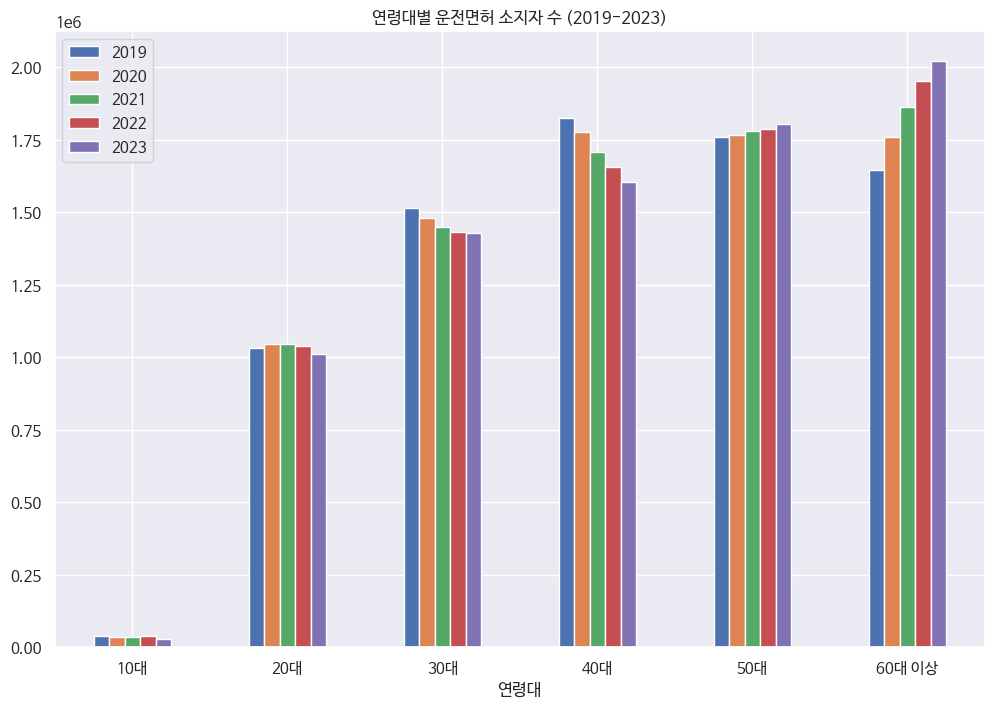

In [6]:
# 연령대 그룹화
grouped_df = pd.DataFrame({
    '연령대': ['10대', '20대', '30대', '40대', '50대', '60대 이상'],
    '2019': [
        df.loc[df['연령별'] == '16-19세', '2019'].sum(),
        df.loc[df['연령별'] == '20-24세', '2019'].sum() + df.loc[df['연령별'] == '25-29세', '2019'].sum(),
        df.loc[df['연령별'] == '30-34세', '2019'].sum() + df.loc[df['연령별'] == '35-39세', '2019'].sum(),
        df.loc[df['연령별'] == '40-44세', '2019'].sum() + df.loc[df['연령별'] == '45-49세', '2019'].sum(),
        df.loc[df['연령별'] == '50-54세', '2019'].sum() + df.loc[df['연령별'] == '55-59세', '2019'].sum(),
        df.loc[df['연령별'].isin(['60-64세', '65-69세', '70-74세', '75-79세', '80세이상']), '2019'].sum()
    ],
    '2020': [
        df.loc[df['연령별'] == '16-19세', '2020'].sum(),
        df.loc[df['연령별'] == '20-24세', '2020'].sum() + df.loc[df['연령별'] == '25-29세', '2020'].sum(),
        df.loc[df['연령별'] == '30-34세', '2020'].sum() + df.loc[df['연령별'] == '35-39세', '2020'].sum(),
        df.loc[df['연령별'] == '40-44세', '2020'].sum() + df.loc[df['연령별'] == '45-49세', '2020'].sum(),
        df.loc[df['연령별'] == '50-54세', '2020'].sum() + df.loc[df['연령별'] == '55-59세', '2020'].sum(),
        df.loc[df['연령별'].isin(['60-64세', '65-69세', '70-74세', '75-79세', '80세이상']), '2020'].sum()
    ],
    '2021': [
        df.loc[df['연령별'] == '16-19세', '2021'].sum(),
        df.loc[df['연령별'] == '20-24세', '2021'].sum() + df.loc[df['연령별'] == '25-29세', '2021'].sum(),
        df.loc[df['연령별'] == '30-34세', '2021'].sum() + df.loc[df['연령별'] == '35-39세', '2021'].sum(),
        df.loc[df['연령별'] == '40-44세', '2021'].sum() + df.loc[df['연령별'] == '45-49세', '2021'].sum(),
        df.loc[df['연령별'] == '50-54세', '2021'].sum() + df.loc[df['연령별'] == '55-59세', '2021'].sum(),
        df.loc[df['연령별'].isin(['60-64세', '65-69세', '70-74세', '75-79세', '80세이상']), '2021'].sum()
    ],
    '2022': [
        df.loc[df['연령별'] == '16-19세', '2022'].sum(),
        df.loc[df['연령별'] == '20-24세', '2022'].sum() + df.loc[df['연령별'] == '25-29세', '2022'].sum(),
        df.loc[df['연령별'] == '30-34세', '2022'].sum() + df.loc[df['연령별'] == '35-39세', '2022'].sum(),
        df.loc[df['연령별'] == '40-44세', '2022'].sum() + df.loc[df['연령별'] == '45-49세', '2022'].sum(),
        df.loc[df['연령별'] == '50-54세', '2022'].sum() + df.loc[df['연령별'] == '55-59세', '2022'].sum(),
        df.loc[df['연령별'].isin(['60-64세', '65-69세', '70-74세', '75-79세', '80세이상']), '2022'].sum()
    ],
    '2023': [
        df.loc[df['연령별'] == '16-19세', '2023'].sum(),
        df.loc[df['연령별'] == '20-24세', '2023'].sum() + df.loc[df['연령별'] == '25-29세', '2023'].sum(),
        df.loc[df['연령별'] == '30-34세', '2023'].sum() + df.loc[df['연령별'] == '35-39세', '2023'].sum(),
        df.loc[df['연령별'] == '40-44세', '2023'].sum() + df.loc[df['연령별'] == '45-49세', '2023'].sum(),
        df.loc[df['연령별'] == '50-54세', '2023'].sum() + df.loc[df['연령별'] == '55-59세', '2023'].sum(),
        df.loc[df['연령별'].isin(['60-64세', '65-69세', '70-74세', '75-79세', '80세이상']), '2023'].sum()
    ]
})

# 데이터 시각화
grouped_df.set_index('연령대').plot(kind='bar', figsize=(12, 8))
plt.title('연령대별 운전면허 소지자 수 (2019-2023)')
plt.ylabel('')
plt.xlabel('연령대')
plt.xticks(rotation=0)
plt.show()
